In [ ]:
!pip install kagglehub
!pip install matplotlib
!pip install pandas

In [2]:
import pandas as pd
from matplotlib import pyplot

In [ ]:
# getting the movies using the API of the website
df = pd.read_json('http://bechdeltest.com/api/v1/getAllMovies')


In [ ]:
len(df)
# 10,408 movies

10408

In [4]:
df['title']

0                   Passage de Venus
1                  La Rosace Magique
2         Sallie Gardner at a Gallop
3                  Le singe musicien
4            Athlete Swinging a Pick
                    ...             
10403              I Saw The TV Glow
10404    Dan Da Dan: First Encounter
10405         Queen of Villains, The
10406                 Substance, The
10407                        Abigail
Name: title, Length: 10408, dtype: object

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10408 entries, 0 to 10407
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10408 non-null  int64 
 1   rating  10408 non-null  int64 
 2   year    10408 non-null  int64 
 3   imdbid  10408 non-null  object
 4   title   10408 non-null  object
dtypes: int64(3), object(2)
memory usage: 406.7+ KB


<Axes: xlabel='rating'>

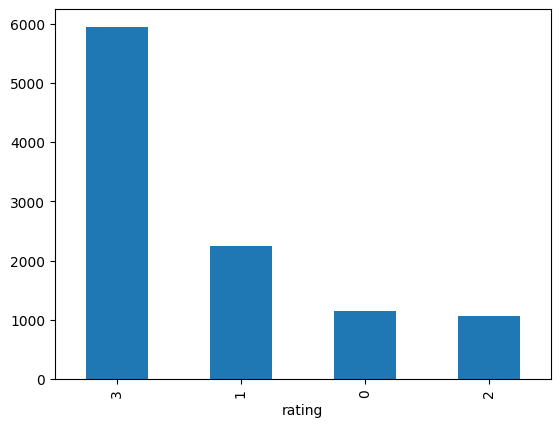

In [19]:
df['rating'].value_counts().plot.bar()

In [ ]:
# Add a new column based on condition
# pythonic version
df['passed_bechdel'] = df['rating'].apply(lambda x: 1 if x == 3 else 0)

In [6]:
df.tail()

,imdbid,year,id,title,rating,passed_bechdel
10403,15574270,2024,11454,I Saw The TV Glow,3,1
10404,33343397,2024,11456,Dan Da Dan: First Encounter,3,1
10405,21187072,2024,11458,"Queen of Villains, The",3,1
10406,17526714,2024,11459,"Substance, The",1,0
10407,27489557,2024,11463,Abigail,3,1


<Axes: xlabel='passed_bechdel'>

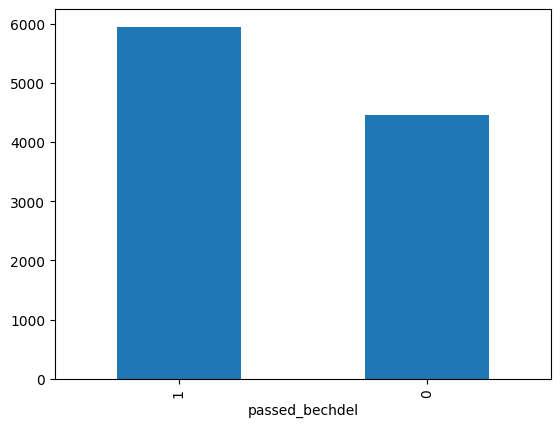

In [ ]:
df['passed_bechdel'].value_counts().plot.bar()
# pretty equal distribution

In [8]:
#df['rating'].value_counts
df['passed_bechdel'].value_counts()

passed_bechdel
1    5950
0    4458
Name: count, dtype: int64

In [9]:
len(df['passed_bechdel'])

10408

In [10]:
df.head()

,title,imdbid,rating,year,id,passed_bechdel
0,Passage de Venus,3155794,0,1874,9602,0
1,La Rosace Magique,14495706,0,1877,9804,0
2,Sallie Gardner at a Gallop,2221420,0,1878,9603,0
3,Le singe musicien,12592084,0,1878,9806,0
4,Athlete Swinging a Pick,7816420,0,1881,9816,0


In [ ]:
# I would like to make a list of movie names, which I would like to download the script from 
movie_titles = df['title'].to_list()
#imdb_id = df['imdbid'].to_list() - didn't use anyway

In [23]:
movie_titles[0:50]

['Passage de Venus',
 'La Rosace Magique',
 'Sallie Gardner at a Gallop',
 'Le singe musicien',
 'Athlete Swinging a Pick',
 'Buffalo Running',
 'L&#39;homme machine',
 'Man Walking Around the Corner',
 'Cockatoo Flying',
 'Child Carrying Flowers to Woman',
 'Jumping Over a Man&#39;s Back-Leapfrog',
 'Man Riding Jumping Horse',
 'Baboon Climbing a Pole',
 'Roundhay Garden Scene',
 'Accordion Player',
 'Traffic Crossing Leeds Bridge',
 'Pferd und Reiter Springen uber ein Hindernis',
 'Brighton Street Scene',
 'Leisurely Pedestrians, Open Topped Buses and Hansom Cabs with Trotting Horses',
 'Hyde Park Corner',
 'Monkeyshines, No. 1',
 'Monkeyshines, No. 2',
 'London&#39;s Trafalgar Square',
 'Monkeyshines, No. 3',
 'Mosquinha',
 'Traffic in King&#39;s Road, Chelsea',
 'Dickson Greeting',
 'Men Boxing',
 'Newark Athlete',
 'Duncan and Another, Blacksmith Shop',
 'Duncan Smoking',
 'Duncan or Devonald with Muslin Cloud',
 'Monkey and Another, Boxing',
 'Je vous aime',
 'La vague',
 'Two Fe

# Matching movie titles to scripts

Matching the movie titles with a bechdel rating to the movie script corpus

from kaggle: https://www.kaggle.com/datasets/gufukuro/movie-scripts-corpus
contains 2858 scripts

pipeline:
- the scripts are in individual txt files in a folder that I've downloaded from kaggle
- find out how many titles in the bechdel label dataset overlap with the movie scripts in the kaggle data set 
- make txt file of script names using bash 
- upload that file to ucloud (movie_scripts.txt)
- loop through movie_scripts file to find overlapping movie titles 
- upload only the overlapping scripts to ucloud and make one big dataframe w bechdel rating

In [29]:
movie_titles[0]

'Passage de Venus'

In [28]:
# using the list movie_titles 

if "Passage de Venus" in movie_titles:
    print("true")
else:
    print("false")

true


In [30]:
if "Zootopia" in movie_titles:
    print("true")
else:
    print("false")

true


In [31]:
# read txt file into list 
with open('data/movie_scripts.txt', 'r') as f:
    movie_scripts = f.read().splitlines()  # Read lines and remove the newline characters

# Print the list
print(movie_scripts)

['10 Cloverfield Lane_1179933.txt', '10 Things I Hate About You_0147800.txt', '101 Days of 101 Dalmatians_0249328.txt', '12 Angry Men_0118528.txt', '12 Monkeys_0114746.txt', '12 Years a Slave_2024544.txt', '127 Hours_1542344.txt', '13 13 13_2991516.txt', '1408_0450385.txt', '1492 Conquest of Paradise_0103594.txt', '15 Minutes_0179626.txt', '16 Blocks_0450232.txt', '17 Again_0974661.txt', '1917_8579674.txt', '1976 l lection du Parti qu b cois_11327984.txt', '2 Broke Girls_1845307.txt', '2 Guns a Grenade a Pizza Guy_1871996.txt', '2001 A Space Road Odyssey_0288910.txt', '2010 The Odyssey Continues_0235153.txt', '2012_1190080.txt', '20th Century Women_4385888.txt', '21 Grams_0315733.txt', '21 Jump Street_1232829.txt', '22 July_7280898.txt', '25th Hour_0307901.txt', '28 Days Later_0289043.txt', '28 Days_0191754.txt', '28 Weeks Later_0463854.txt', '29th Street Highlander 2 The Quickening Billy Bathgate Year of the Gun_6099126.txt', '3 10 to Yuma_0381849.txt', '3 Godfathers_0040064.txt', '3 

Now I want to see how many titles and scripts overlap

In [32]:
# List to store matches as tuples
matched_pairs = []

# Loop through movie titles and find matching scripts
for title in movie_titles:
    for script in movie_scripts:
        if script.startswith(title):
            matched_pairs.append((title, script))  # Add the match as a tuple
            break  # Stop checking once a match is found for this title

# Print the results
print("Matched pairs:")
for pair in matched_pairs:
    print(pair)

# Unmatched titles
unmatched_titles = [title for title in movie_titles if title not in [pair[0] for pair in matched_pairs]]
print("\nUnmatched titles:", unmatched_titles)



Matched pairs:
('Snow White', 'Snow White and the Huntsman_1735898.txt')
('Battleship Potemkin', 'Battleship Potemkin_0015648.txt')
('It', 'It Follows_3235888.txt')
('Metropolis', 'Metropolis_0017136.txt')
('M', 'MASH_0066026.txt')
('Grand Hotel', 'Grand Hotel_0022958.txt')
('Freaks', 'Freaks_0022913.txt')
('Vampyr', 'Vampyr_0023649.txt')
('Scarface', 'Scarface_0086250.txt')
('King Kong', 'King Kong_0024216.txt')
('Little Women', 'Little Women_3281548.txt')
('Alice in Wonderland', 'Alice in Wonderland_1014759.txt')
('Duck Soup', 'Duck Soup_0023969.txt')
('It Happened One Night', 'It Happened One Night_0025316.txt')
('Spitfire', 'Spitfire_5913184.txt')
('Maniac', 'Maniac_5580146.txt')
('Anna Karenina', 'Anna Karenina_1781769.txt')
('Fury', 'Fury_2713180.txt')
('Conquest', 'Conquest of the Planet of the Apes_0068408.txt')
('Lost Horizon', 'Lost Horizon_0029162.txt')
('Bringing Up Baby', 'Bringing Up Baby_0029947.txt')
('Angels with Dirty Faces', 'Angels with Dirty Faces_0029870.txt')
('G

In [ ]:
matched_pairs[0] # might not be the exact right movie but okay

('Snow White', 'Snow White and the Huntsman_1735898.txt')

In [ ]:
len(matched_pairs) # 1450 might be good enough if the distribution is okay

1450

In [34]:
len(unmatched_titles)

8958

In [ ]:
# Save only the script file names from matched_pairs
# use this txt file to copy the matched scripts to another folder in bash 
matched_script_titles = [pair[1] for pair in matched_pairs]

# Write the script titles to a text file
with open("data/matched_script_titles.txt", "w") as f:
    for script in matched_script_titles:
        f.write(script + "\n")

print("Script titles saved to matched_script_titles.txt")


Script titles saved to matched_script_titles.txt


In [48]:
# filtering the dataframe to only contain the matched titles

# Extract matched titles from matched_pairs
matched_titles = [pair[0] for pair in matched_pairs]

# Filter the DataFrame to keep only rows where the title is in matched_titles
filtered_df = df[df['title'].isin(matched_titles)]

# Display the filtered DataFrame
print(len(filtered_df))

1450


In [49]:
filtered_df.head()

,imdbid,year,id,title,rating,passed_bechdel
143,0007361,1916,7004,Snow White,3,1
189,0015648,1925,1308,Battleship Potemkin,0,0
203,0018033,1927,1227,It,3,1
204,0017136,1927,1267,Metropolis,1,0
250,0022100,1931,610,M,3,1


<Axes: xlabel='passed_bechdel'>

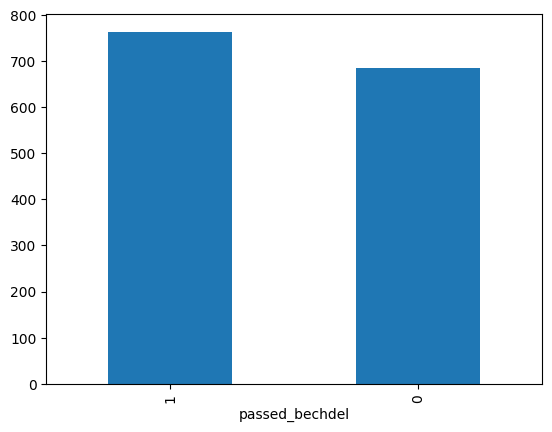

In [ ]:
# check distribution of bechdel labels of the matched pairs 
filtered_df['passed_bechdel'].value_counts().plot.bar()


<Axes: xlabel='year'>

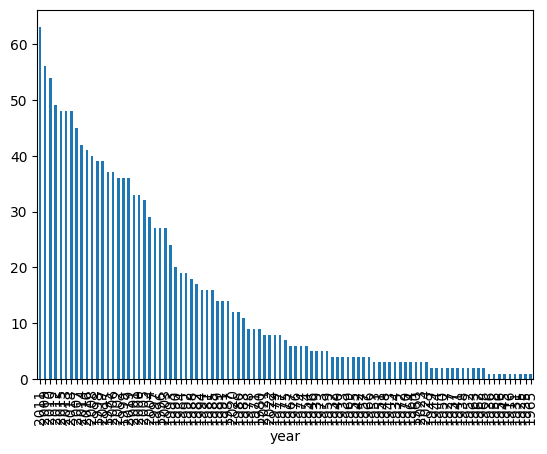

In [ ]:
filtered_df['year'].value_counts().plot.bar() # make plot better


<Axes: xlabel='rating'>

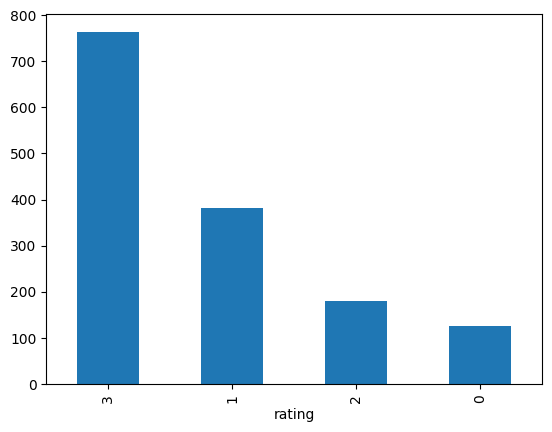

In [53]:
filtered_df['rating'].value_counts().plot.bar() # make plot better

looks good! 

In [ ]:
# now I want to upload the txt files and append them to the df one by one 